In [1]:
import json
import os
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
experiments_to_run = [1]

In [3]:
for experiment_id in experiments_to_run:
    # Experiment to run
    experiments_path = f"/Users/pablomonteagudo/Documents/Cambridge/L65/clrs-ls65/results/{experiment_id}/slurm_experiment.out"

    losses = []

    with open(experiments_path, 'r') as file:
        lines = file.readlines()

        for line in lines:
            # Extracting the current loss from the given log line
            # Regular expression to match the current loss value
            match = re.search(r"step (\d+) current loss ([\d\.]+), current_train_items (\d+)", line)

            # Extract the step, current loss, and current train items if present
            step, current_loss, current_train_items = match.groups() if match else (None, None, None)

            if step is not None:
                print(int(step), float(current_loss), int(current_train_items))
                # Save current loss
                losses.append(float(current_loss))

            

0 3.855027 32
1 4.4475 64
2 4.020199 96
3 4.7399 128
4 4.766057 160
5 1.480133 192
6 2.344409 224
7 3.913366 256
8 3.36116 288
9 3.460482 320
10 1.376039 352
11 2.060717 384
12 2.51476 416
13 2.768445 448
14 2.966402 480
15 1.278588 512
16 1.819082 544
17 2.155572 576
18 2.505004 608
19 2.966556 640
20 0.946035 672
21 1.562903 704
22 2.200181 736
23 2.267815 768
24 2.487934 800
25 0.901107 832
26 1.193433 864
27 1.688642 896
28 1.869082 928
29 2.24525 960
30 0.621033 992
31 1.076649 1024
32 1.627026 1056
33 1.854334 1088
34 2.009438 1120
35 0.617117 1152
36 0.932838 1184
37 1.518664 1216
38 1.832348 1248
39 1.803203 1280
40 0.55379 1312
41 0.984116 1344
42 1.59102 1376
43 1.51441 1408
44 1.830922 1440
45 0.445902 1472
46 0.656701 1504
47 1.431763 1536
48 1.264044 1568
49 1.504393 1600
50 0.341756 1632
51 0.734038 1664
52 1.184945 1696
53 1.12056 1728
54 1.633379 1760
55 0.373198 1792
56 0.691096 1824
57 1.029215 1856
58 1.241798 1888
59 1.389302 1920
60 0.290282 1952
61 0.563951 1984
6

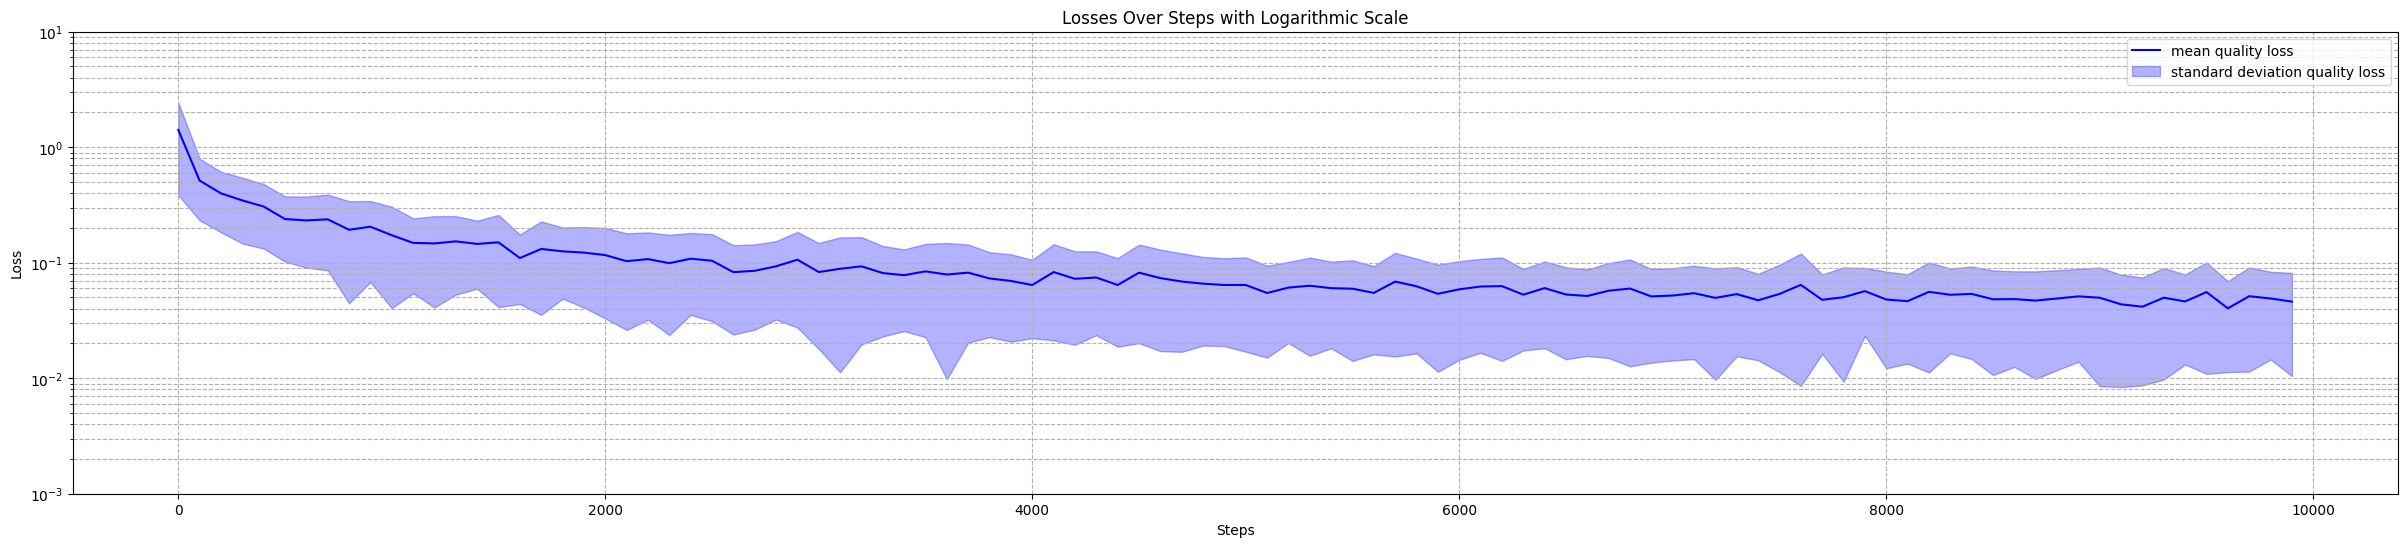

In [4]:
# Number of elements
num_elements = 100
# Example data for demonstration purposes
# Calculate the mean for every 10 elements
means = np.array([np.mean(losses[i:i+num_elements]) for i in range(0, len(losses), num_elements)])
std = np.array([np.std(losses[i:i+num_elements]) for i in range(0, len(losses), num_elements)])
steps = list(range(0, len(losses), num_elements))

# Creating the plot with a logarithmic scale on the y-axis
plt.figure(figsize=(30, 6))
plt.plot(steps, means, linestyle='-', color='blue', label='mean quality loss')
# Plot standard deviations as transparent ranges
plt.fill_between(steps, means - std, means + std, color='blue', alpha=0.3, label='standard deviation quality loss')
plt.yscale('log')  # Setting the y-axis to a logarithmic scale
plt.ylim(1e-3, 1e1)  # Setting the limits for the y-axis
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Losses Over Steps with Logarithmic Scale')
plt.grid(True, which="both", ls="--")  # Adding grid lines for better readability
plt.legend()
plt.show()

In [51]:
experiments_to_run = [7]

In [52]:
for experiment_id in experiments_to_run:
    # Experiment to run
    experiments_path = f"/Users/pablomonteagudo/Documents/Cambridge/L65/clrs-ls65/results/{experiment_id}/experiment_log.out"

    quality_losses = []
    regularisation_losses = []
    regularisation_losses_val = []

    with open(experiments_path, 'r') as file:
        lines = file.readlines()

        for line in lines:
            
            # Extracting the current loss from the given log line
            # Regular expression to match the current loss value
            match = re.search(r"\[DEBUG\] Regularised loss: ([\d\.]+), Regularisation weight: ([\d\.]+), MSE loss: ([\d\.]+), Quality loss: ([\d\.]+)", line)

            if match:
                # Extract the step, current loss, and current train items if present
                regularised_loss, regularisation_weight, mse_loss, quality_loss = match.groups()
                # Add to lists
                quality_losses.append(float(quality_loss))
                regularisation_losses.append(float(mse_loss))

            # Extracting the current loss from the given log line
            # Regular expression to match the current loss value
            match = re.search(r"\[DEBUG-VAL\] Regularised loss: ([\d\.]+), Regularisation weight: ([\d\.]+), MSE loss: ([\d\.]+)", line)

            if match:
                # Extract the step, current loss, and current train items if present
                regularised_loss, regularisation_weight, mse_loss = match.groups()
                # Add to validation list
                regularisation_losses_val.append(float(mse_loss))

# Remove first element
quality_losses = quality_losses[1:]
regularisation_losses = regularisation_losses[1:]
regularisation_losses_val = regularisation_losses_val[2:-1]

print(len(quality_losses))
print(len(regularisation_losses))
print(len(regularisation_losses_val))

1999
1999
78


In [53]:
num_elements = 50
num_elements_val = 2
limit_steps = 50

39
39


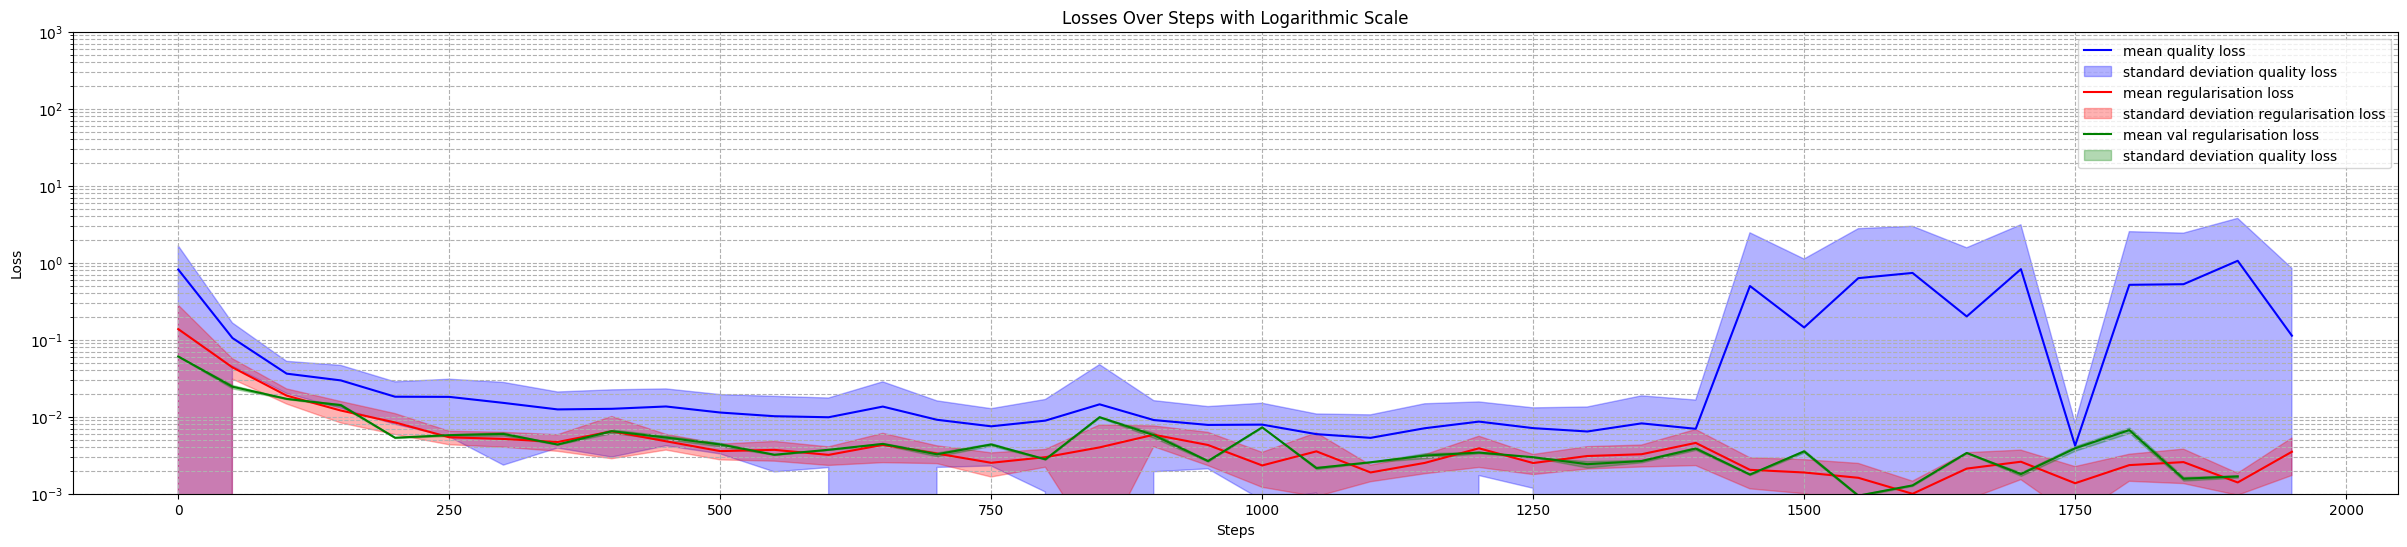

In [54]:
#quality_losses = quality_losses[:limit_steps]
#regularisation_losses = regularisation_losses[:limit_steps]
# Example data for demonstration purposes
# Calculate the mean for every 10 elements
means_quality = np.array([np.mean(quality_losses[i:i+num_elements]) for i in range(0, len(quality_losses), num_elements)])
std_quality = np.array([np.std(quality_losses[i:i+num_elements]) for i in range(0, len(quality_losses), num_elements)])

means_regularisation = np.array([np.mean(regularisation_losses[i:i+num_elements]) for i in range(0, len(regularisation_losses ), num_elements)])
std_regularisation = np.array([np.std(regularisation_losses [i:i+num_elements]) for i in range(0, len(regularisation_losses ), num_elements)])

means_regularisation_val = np.array([np.mean(regularisation_losses_val[i:i+num_elements_val]) for i in range(0, len(regularisation_losses_val), num_elements_val)])
std_regularisation_val = np.array([np.std(regularisation_losses_val[i:i+num_elements_val]) for i in range(0, len(regularisation_losses_val), num_elements_val)])

#### 
# Try with median and quartiles
####

print(len(means_regularisation_val))
print(len(std_regularisation_val))

steps = list(range(0, len(quality_losses), num_elements))

# Creating the plot with a logarithmic scale on the y-axis
plt.figure(figsize=(30, 6))
plt.plot(steps, means_quality, linestyle='-', color='blue', label='mean quality loss')
# Plot standard deviations as transparent ranges
plt.fill_between(steps, means_quality - std_quality, means_quality + std_quality, color='blue', alpha=0.3, label='standard deviation quality loss')

plt.plot(steps, means_regularisation, linestyle='-', color='red', label='mean regularisation loss')
# Plot standard deviations as transparent ranges
plt.fill_between(steps, means_regularisation - std_regularisation, means_regularisation + std_regularisation, color='red', alpha=0.3, label='standard deviation regularisation loss')

plt.plot(steps[:-1], means_regularisation_val, linestyle='-', color='green', label='mean val regularisation loss')
# Plot standard deviations as transparent ranges
plt.fill_between(steps[:-1], means_regularisation_val - std_regularisation_val, means_regularisation_val + std_regularisation_val, color='green', alpha=0.3, label='standard deviation quality loss')

plt.yscale('log')  # Setting the y-axis to a logarithmic scale
plt.ylim(1e-3, 1e3)  # Setting the limits for the y-axis
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Losses Over Steps with Logarithmic Scale')
plt.grid(True, which="both", ls="--")  # Adding grid lines for better readability
plt.legend()
plt.show()

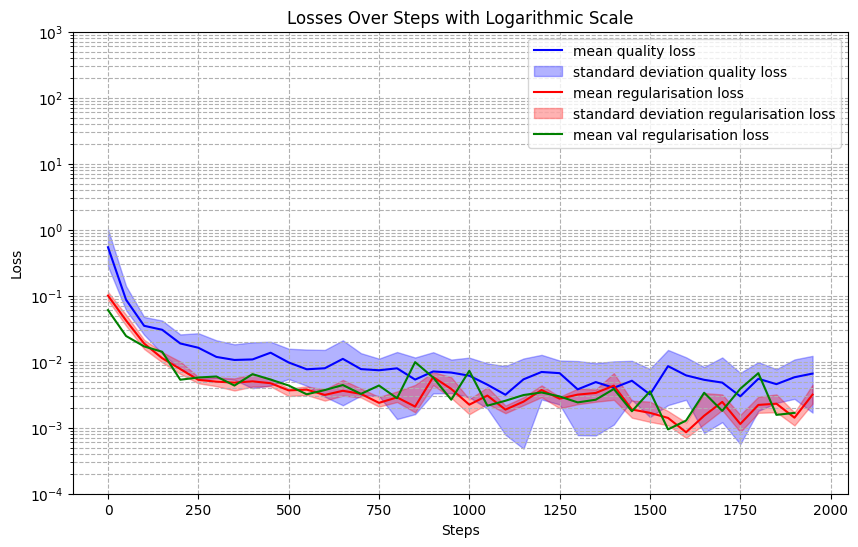

In [56]:
# Example data for demonstration purposes
# Calculate the mean for every 10 elements
medians_quality = np.array([np.median(quality_losses[i:i+num_elements]) for i in range(0, len(quality_losses), num_elements)])
percentile_25_quality = np.array([np.percentile(quality_losses[i:i+num_elements], 25) for i in range(0, len(quality_losses), num_elements)])
percentile_75_quality = np.array([np.percentile(quality_losses[i:i+num_elements], 75) for i in range(0, len(quality_losses), num_elements)])

medians_regularisation = np.array([np.median(regularisation_losses[i:i+num_elements]) for i in range(0, len(regularisation_losses ), num_elements)])
percentile_25_regularisation = np.array([np.percentile(regularisation_losses[i:i+num_elements], 25) for i in range(0, len(regularisation_losses), num_elements)])
percentile_75_regularisation = np.array([np.percentile(regularisation_losses[i:i+num_elements], 75) for i in range(0, len(regularisation_losses), num_elements)])

means_regularisation_val = np.array([np.mean(regularisation_losses_val[i:i+num_elements_val]) for i in range(0, len(regularisation_losses_val), num_elements_val)])

steps = list(range(0, len(quality_losses), num_elements))

# Creating the plot with a logarithmic scale on the y-axis
plt.figure(figsize=(10, 6))
plt.plot(steps, medians_quality, linestyle='-', color='blue', label='mean quality loss')
# Plot standard deviations as transparent ranges
plt.fill_between(steps, percentile_25_quality, percentile_75_quality, color='blue', alpha=0.3, label='standard deviation quality loss')

plt.plot(steps, medians_regularisation, linestyle='-', color='red', label='mean regularisation loss')
# Plot standard deviations as transparent ranges
plt.fill_between(steps, percentile_25_regularisation, percentile_75_regularisation, color='red', alpha=0.3, label='standard deviation regularisation loss')

plt.plot(steps[:-1], means_regularisation_val, linestyle='-', color='green', label='mean val regularisation loss')
# Plot standard deviations as transparent ranges

plt.yscale('log')  # Setting the y-axis to a logarithmic scale
plt.ylim(1e-4, 1e3)  # Setting the limits for the y-axis
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Losses Over Steps with Logarithmic Scale')
plt.grid(True, which="both", ls="--")  # Adding grid lines for better readability
plt.legend()
plt.show()